### Import dataset

In [1]:
#!pip install xlrd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data=pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',sheet_name = 'Data')

data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


There are 5000 records without any missing value.

### Data cleaning

There are negative experience. We can delete these abnormal records.

In [2]:
data2=pd.DataFrame(data[data['Experience']>0])
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4882.0,2496.172061,1439.377900,1.0,1254.25,2490.5,3735.75,5000.0
Age,4882.0,45.826506,11.155088,25.0,36.00,46.0,55.00,67.0
Experience,4882.0,20.605899,11.136704,1.0,11.00,21.0,30.00,43.0
Income,4882.0,73.870750,46.112752,8.0,39.00,64.0,98.00,224.0
ZIP Code,4882.0,93150.227366,2130.612121,9307.0,91910.25,93437.0,94608.00,96651.0
Family,4882.0,2.386112,1.148222,1.0,1.00,2.0,3.00,4.0
CCAvg,4882.0,1.935385,1.745068,0.0,0.70,1.5,2.60,10.0
Education,4882.0,1.874846,0.839329,1.0,1.00,2.0,3.00,3.0
Mortgage,4882.0,56.844326,102.009136,0.0,0.00,0.0,101.75,635.0
Personal Loan,4882.0,0.096887,0.295833,0.0,0.00,0.0,0.00,1.0


### Correlation analysis

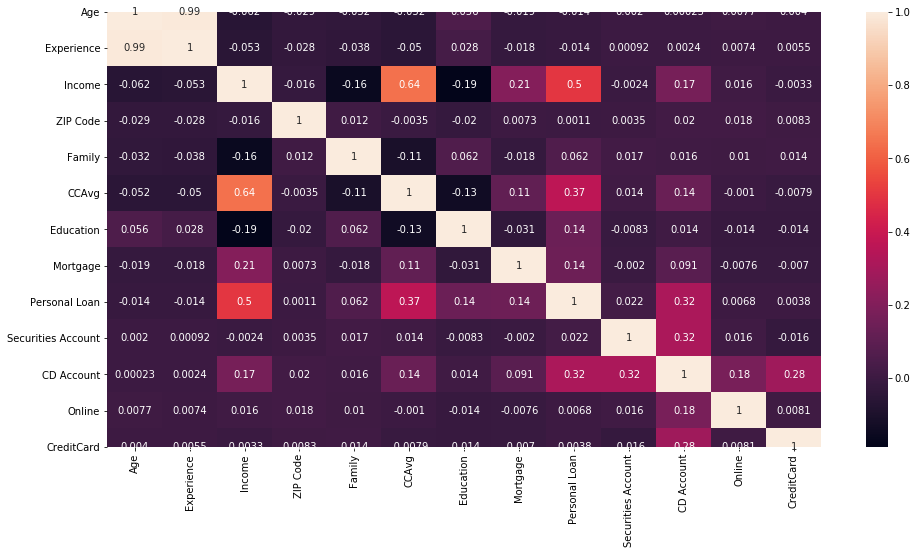

In [6]:
fig,axes=plt.subplots(figsize=(16, 8))
sns.heatmap(data2.drop('ID',axis=1).corr(),annot=True)

**The correlation between each feature and Personal Loan:**

**Strong**: Income(0.50), CCAvg(0.37), CD_Account(0.32)

**Weak**: Education(0.14), Mortgage(0.14), Family(0.062)

**Not related**: Age, Experience, ZIPCode, Securities_Account, Online, CreditCard

### Data visualization

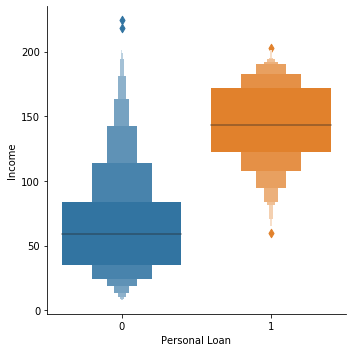

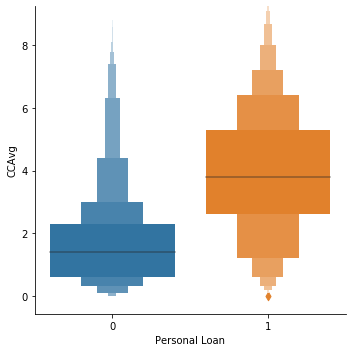

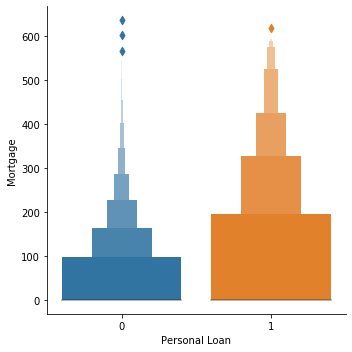

In [7]:
sns.catplot('Personal Loan','Income',data=data2,kind='boxen')
sns.catplot('Personal Loan','CCAvg',data=data2,kind='boxen')
sns.catplot('Personal Loan','Mortgage',data=data2,kind='boxen')

**Conclusion**: Clients with higher income, higher CCAvg, and higher mortgage tend to accept the personal loan offer.

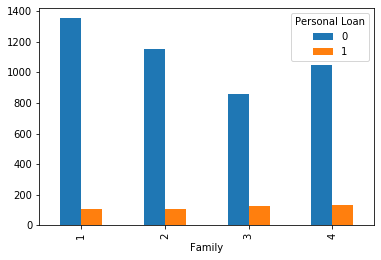

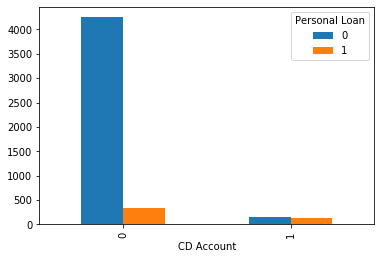

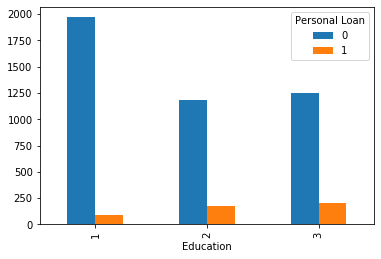

In [8]:
cross1=pd.crosstab(data2['Family'],data2['Personal Loan'])
cross1.plot(kind='bar')
cross2=pd.crosstab(data2['CD Account'],data2['Personal Loan'])
cross2.plot(kind='bar')
cross3=pd.crosstab(data2['Education'],data2['Personal Loan'])
cross3.plot(kind='bar')

Clients who tend to accept the personal loan offer have in common:

1. Have CD account;

2. Education has an important impact that the higher education level, the higher likelihood to accept the offer;

3. Family has low impact but when there are more than 2 people, the likelihood would be higher.

### Machine Learning Model

**Feature selection**: Based on previous analysis, we select the six features - Income, CCAvg, Mortgage, CD Account, Education, and Family.

**Split the dataset**: 80% for training and 20% for testing.

In [9]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Cut the continious variables into boxes
data2['Incomebox']=pd.qcut(data2.Income,10,labels=range(0,10)).astype(int)
data2['CCAvgbox']=pd.qcut(data2.CCAvg,10,labels=range(0,10)).astype(int)
data2['Mortgagebox']=pd.cut(data2.Mortgage,10,labels=range(0,10)).astype(int)

y=data2.loc[:,'Personal Loan']
columns=data2.columns.drop(['ID','Age','Experience','Income','ZIP Code','CCAvg','Mortgage','Personal Loan','Securities Account','Online','CreditCard'])
train=data2[columns]
X_train,X_test,y_train,y_test=train_test_split(train,y,train_size=0.8)

In [10]:
print(X_train.shape)

(3905, 6)


In [11]:
print(y_train.shape)

(3905,)


**Train the model**:

In [15]:
lrmodel=LogisticRegression()
lrmodel.fit(X_train, y_train) 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the model:**

In [16]:
lrmodel.score(X_test,y_test)

0.9611054247697032

### Application